# EDA Project - Youtube Analysis
## Author - Dakshay Ahuja(2010990178)
***

In [48]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from scipy import stats
from warnings import filterwarnings
filterwarnings('ignore')

In [49]:
yt_views = pd.read_csv("Dataset/train.csv")
print(yt_views.head())

     Video_id category_id          channel_title  subscriber  \
0   HDR9SQc79          22           CaseyNeistat   9086142.0   
1  KNH52UF?48          24        LastWeekTonight   5937292.0   
2  QTW28IRG36          23           Rudy Mancuso   4191209.0   
3  MGL76WI]26          24  Good Mythical Morning  13186408.0   
4  TWP93KXT70          24               nigahiga  20563106.0   

                                               title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1  The Trump Presidency: Last Week Tonight with J...   
2  Racist Superman | Rudy Mancuso, King Bach & Le...   
3                   Nickelback Lyrics: Real or Fake?   
4                           I Dare You: GOING BALD!?   

                                                tags  \
0                                    SHANtell martin   
1  last week tonight trump presidency|last week t...   
2  racist superman|rudy|mancuso|king|bach|racist|...   
3  rhett and link|gmm|good mythical morning|rhett...  

***
### Check the Dimensions of the Data

In [50]:
rows, columns = yt_views.shape
print(f"The dataset contains {rows} rows and {columns} columns.")
print(yt_views.columns)

The dataset contains 3198 rows and 19 columns.
Index(['Video_id', 'category_id', 'channel_title', 'subscriber', 'title',
       'tags', 'description', 'Trend_day_count', 'Tag_count',
       'Trend_tag_count', 'comment_count', 'comment_disabled',
       'like dislike disabled', 'likes', 'dislike', 'tag appered in title',
       'views', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')


***
### Summary Statistics

In [51]:
# Summary statistics for numerical features
print("Summary statistics for numerical features:")
print(yt_views.describe())

# General overview including data types
print("\nGeneral overview of data:")
print(yt_views.info())

Summary statistics for numerical features:
         subscriber  Trend_day_count  Unnamed: 17
count  3.175000e+03      3197.000000          1.0
mean   3.823981e+06         7.964342       2544.0
std    2.865771e+07        78.556055          NaN
min    0.000000e+00         0.000000       2544.0
25%    2.428800e+05         4.000000       2544.0
50%    1.241220e+06         7.000000       2544.0
75%    3.812622e+06        10.000000       2544.0
max    1.576229e+09      4444.000000       2544.0

General overview of data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               3198 non-null   object 
 1   category_id            3192 non-null   object 
 2   channel_title          3195 non-null   object 
 3   subscriber             3175 non-null   float64
 4   title                  3195 non-null   object 
 5   tags

***
### Identifying Numeric and Categorical Columns

In [52]:
# Identifying numeric columns
numeric_columns = yt_views.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numeric columns: {numeric_columns} \n")

# Identifying categorical columns
categorical_columns = yt_views.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_columns}")

Numeric columns: ['subscriber', 'Trend_day_count', 'Unnamed: 17'] 

Categorical columns: ['Video_id', 'category_id', 'channel_title', 'title', 'tags', 'description', 'Tag_count', 'Trend_tag_count', 'comment_count', 'comment_disabled', 'like dislike disabled', 'likes', 'dislike', 'tag appered in title', 'views', 'Unnamed: 18']


***
### Fixing Data type of columns

In [53]:
# Columns to be converted
columns_to_convert = ['category_id','Tag_count', 'likes', 'dislike', 'views', 'comment_count', 'Trend_day_count', 'Trend_tag_count']

# Convert columns to numeric data type
for column in columns_to_convert:
    yt_views[column] = pd.to_numeric(yt_views[column], errors='coerce')

print("Data types after conversion:")
print(yt_views.dtypes)

Data types after conversion:
Video_id                  object
category_id              float64
channel_title             object
subscriber               float64
title                     object
tags                      object
description               object
Trend_day_count          float64
Tag_count                float64
Trend_tag_count          float64
comment_count            float64
comment_disabled          object
like dislike disabled     object
likes                    float64
dislike                  float64
tag appered in title      object
views                    float64
Unnamed: 17              float64
Unnamed: 18               object
dtype: object


***
### Missing Value Analysis

##### Dropping unnecessary columns

In [54]:
yt_views.drop(['Unnamed: 17', 'Unnamed: 18'], axis=1, inplace=True)

##### Display the Count of Missing Values in Each Column

In [55]:
# Using isnull() method to check for missing values, sum() to aggregate them
missing_values_count = yt_views.isnull().sum()

# Printing the count of missing values for each column
print("Missing Values per Column:")
print(missing_values_count)

Missing Values per Column:
Video_id                    0
category_id                 7
channel_title               3
subscriber                 23
title                       3
tags                      152
description                65
Trend_day_count             1
Tag_count                   2
Trend_tag_count             3
comment_count            1015
comment_disabled            0
like dislike disabled       0
likes                       1
dislike                     1
tag appered in title        1
views                       1
dtype: int64


##### Display Missing Values as a Percentage for Each Column

In [56]:
# Calculate the total number of rows in the DataFrame
total_rows = len(yt_views)

# Calculate the percentage of missing values for each column
missing_values_percentage = (yt_views.isnull().sum() / total_rows) * 100

# Printing the percentage of missing values for each column
print("Missing Values Percentage per Column:")
print(missing_values_percentage)

Missing Values Percentage per Column:
Video_id                  0.000000
category_id               0.218887
channel_title             0.093809
subscriber                0.719199
title                     0.093809
tags                      4.752971
description               2.032520
Trend_day_count           0.031270
Tag_count                 0.062539
Trend_tag_count           0.093809
comment_count            31.738587
comment_disabled          0.000000
like dislike disabled     0.000000
likes                     0.031270
dislike                   0.031270
tag appered in title      0.031270
views                     0.031270
dtype: float64


#### Fill Missing Values for Numeric Columns

In [57]:
# Columns to be filled (numeric ones from the previous step)
columns_to_fill_numeric = ['subscriber', 'Trend_day_count', 'Tag_count', 'Trend_tag_count', 'comment_count', 'likes', 'dislike', 'views']

# Filling missing values with the mean of each respective column
for column in columns_to_fill_numeric:
    mean_value = yt_views[column].mean()
    yt_views[column].fillna(mean_value, inplace=True)

# Confirm that there are no more missing values in these columns
print("Missing Values After Filling Numeric Columns:")
print(yt_views[columns_to_fill_numeric].isnull().sum())

Missing Values After Filling Numeric Columns:
subscriber         0
Trend_day_count    0
Tag_count          0
Trend_tag_count    0
comment_count      0
likes              0
dislike            0
views              0
dtype: int64


#### Fill Missing Values for Categorical Columns

In [58]:
# Columns to be filled (categorical ones)
columns_to_fill_cat = ['category_id', 'channel_title', 'title', 'tags', 'description']

# Filling missing values with the mode of each respective column
for column in columns_to_fill_cat:
    mode_value = yt_views[column].mode()[0]
    yt_views[column].fillna(mode_value, inplace=True)

# Confirm that there are no more missing values in these columns
print("Missing Values After Filling Categorical Columns:")
print(yt_views[columns_to_fill_cat].isnull().sum())

Missing Values After Filling Categorical Columns:
category_id      0
channel_title    0
title            0
tags             0
description      0
dtype: int64


***
### Detecting and treating Outliers

In [59]:
# Numeric Columns to check for outliers
numerical_columns = ['subscriber', 'Trend_day_count', 'Tag_count', 'Trend_tag_count',
                     'comment_count', 'likes', 'dislike', 'views']

# Loop through each numerical column to replace outliers with median
for col in numerical_columns:
    Q1 = yt_views[col].quantile(0.25)
    Q3 = yt_views[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (yt_views[col] < lower_bound) | (yt_views[col] > upper_bound)

    # Print the number of outliers in each column
    print(f"Number of outliers in {col}: {outliers.sum()}")

    # Find the median
    median_value = yt_views[col].median()

    # Replace outliers with median using .loc[]
    yt_views.loc[outliers, col] = median_value


Number of outliers in subscriber: 343
Number of outliers in Trend_day_count: 1
Number of outliers in Tag_count: 2
Number of outliers in Trend_tag_count: 1
Number of outliers in comment_count: 1
Number of outliers in likes: 1
Number of outliers in dislike: 0
Number of outliers in views: 312


***
## Visualisations
***

#### Histograms for Numerical Columns

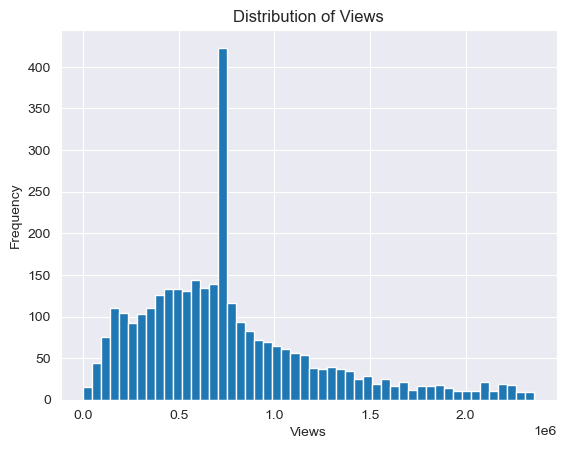

In [60]:
# Histogram for 'views'
plt.hist(yt_views['views'], bins=50)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

#### Bar Plot for Categorical Columns

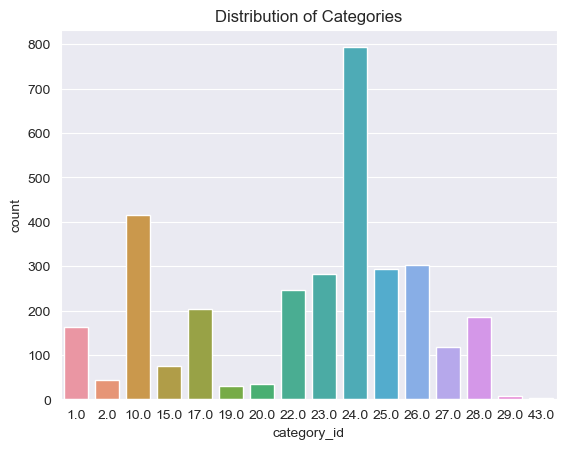

In [77]:
# Bar plot for 'category_id'
sns.countplot(data=yt_views, x='category_id')
plt.title('Distribution of Categories')
plt.show()

#### Correlation Heatmap

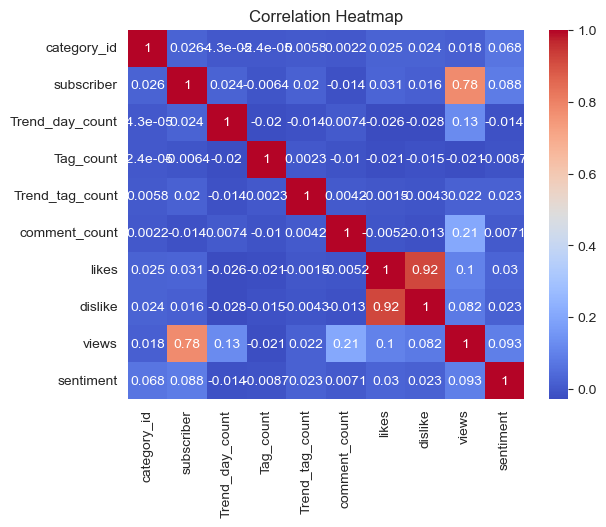

In [78]:
# Correlation heatmap
corr_matrix = yt_views.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Scatter Plot for Target Variable

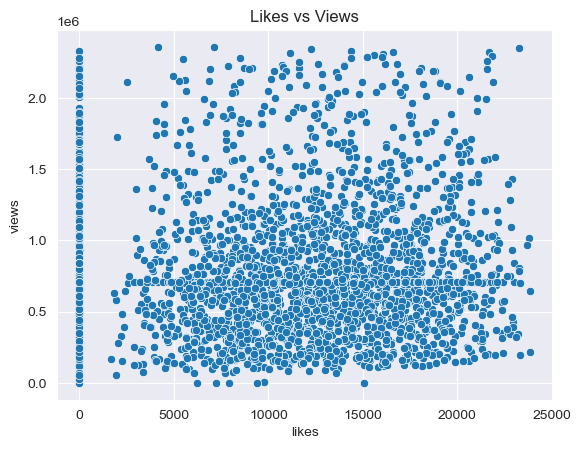

In [79]:
# Scatter plot between 'likes' and 'views'
sns.scatterplot(data=yt_views, x='likes', y='views')
plt.title('Likes vs Views')
plt.show()

#### Box Plot for Outliers

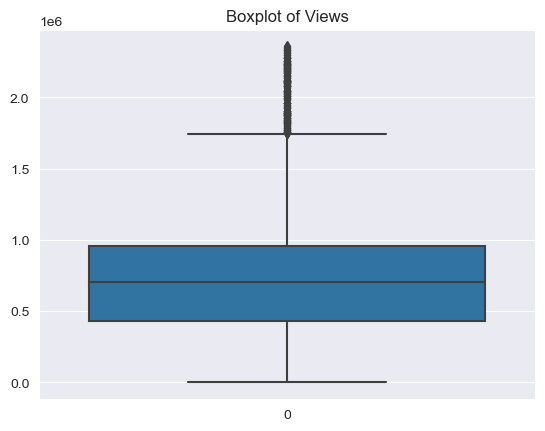

In [80]:
# Box plot for 'views'
sns.boxplot(yt_views['views'])
plt.title('Boxplot of Views')
plt.show()

#### Line Plot for Time Series Data

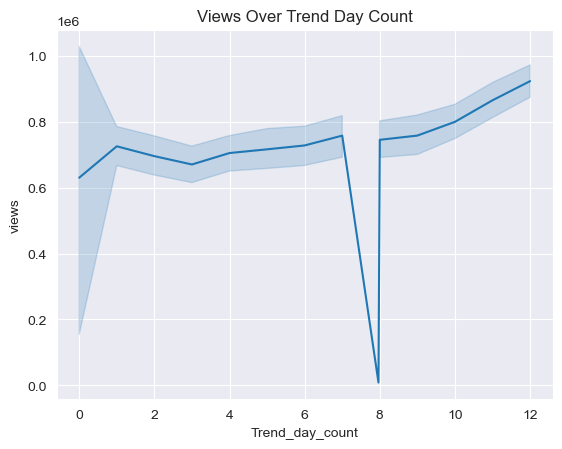

In [81]:
# Line plot to visualize 'views' against 'Trend_day_count'
sns.lineplot(data=yt_views, x='Trend_day_count', y='views')
plt.title('Views Over Trend Day Count')
plt.show()

#### Pair Plot for Multi-Variate Analysis

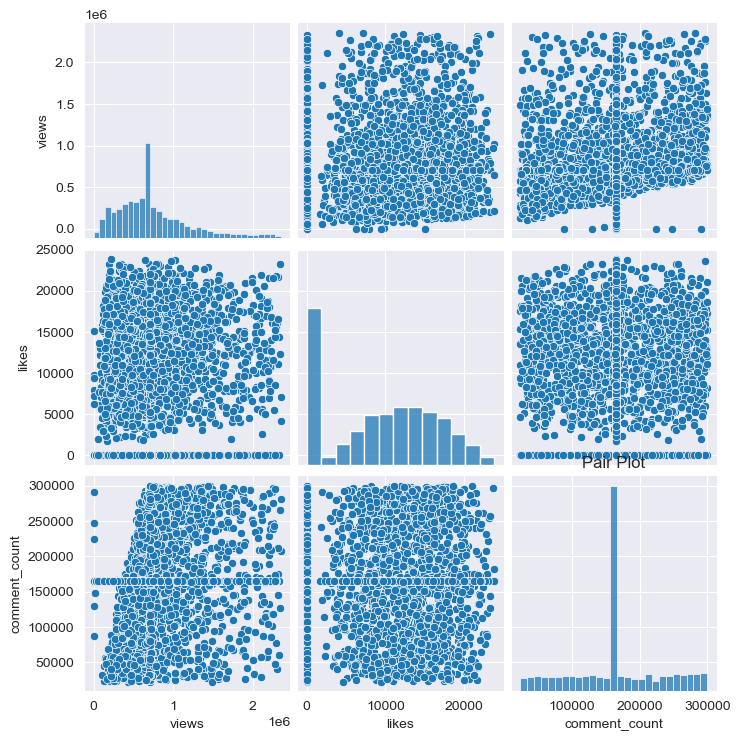

In [82]:
# Pair plot for numerical columns
sns.pairplot(yt_views[['views', 'likes', 'comment_count']])
plt.title('Pair Plot')
plt.show()

#### Violin Plot for Mixed Data

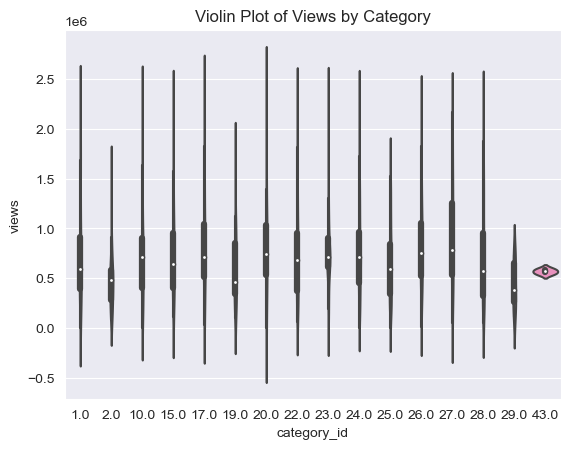

In [83]:
# Violin plot for 'views' by 'category_id'
sns.violinplot(data=yt_views, x='category_id', y='views')
plt.title('Violin Plot of Views by Category')
plt.show()

#### Density Plot

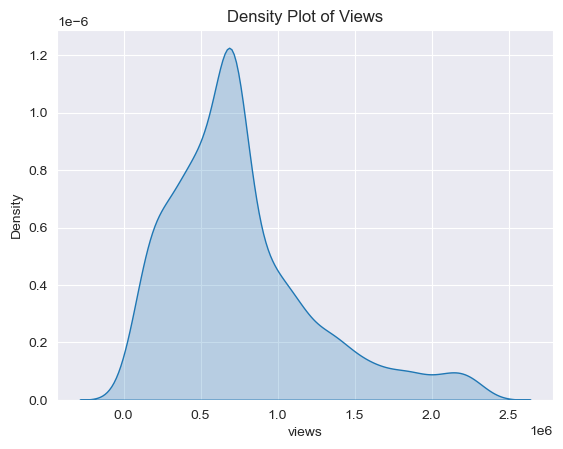

In [84]:
# Density plot for 'views'
sns.kdeplot(yt_views['views'], shade=True)
plt.title('Density Plot of Views')
plt.show()

#### Strip Plot

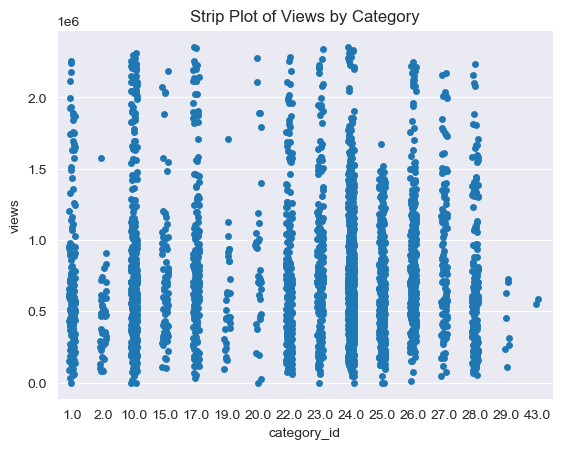

In [85]:
# Strip Plot
sns.stripplot(x="category_id", y="views", data=yt_views, jitter=True)
plt.title('Strip Plot of Views by Category')
plt.show()

#### Facet Grid with Scatter Plot

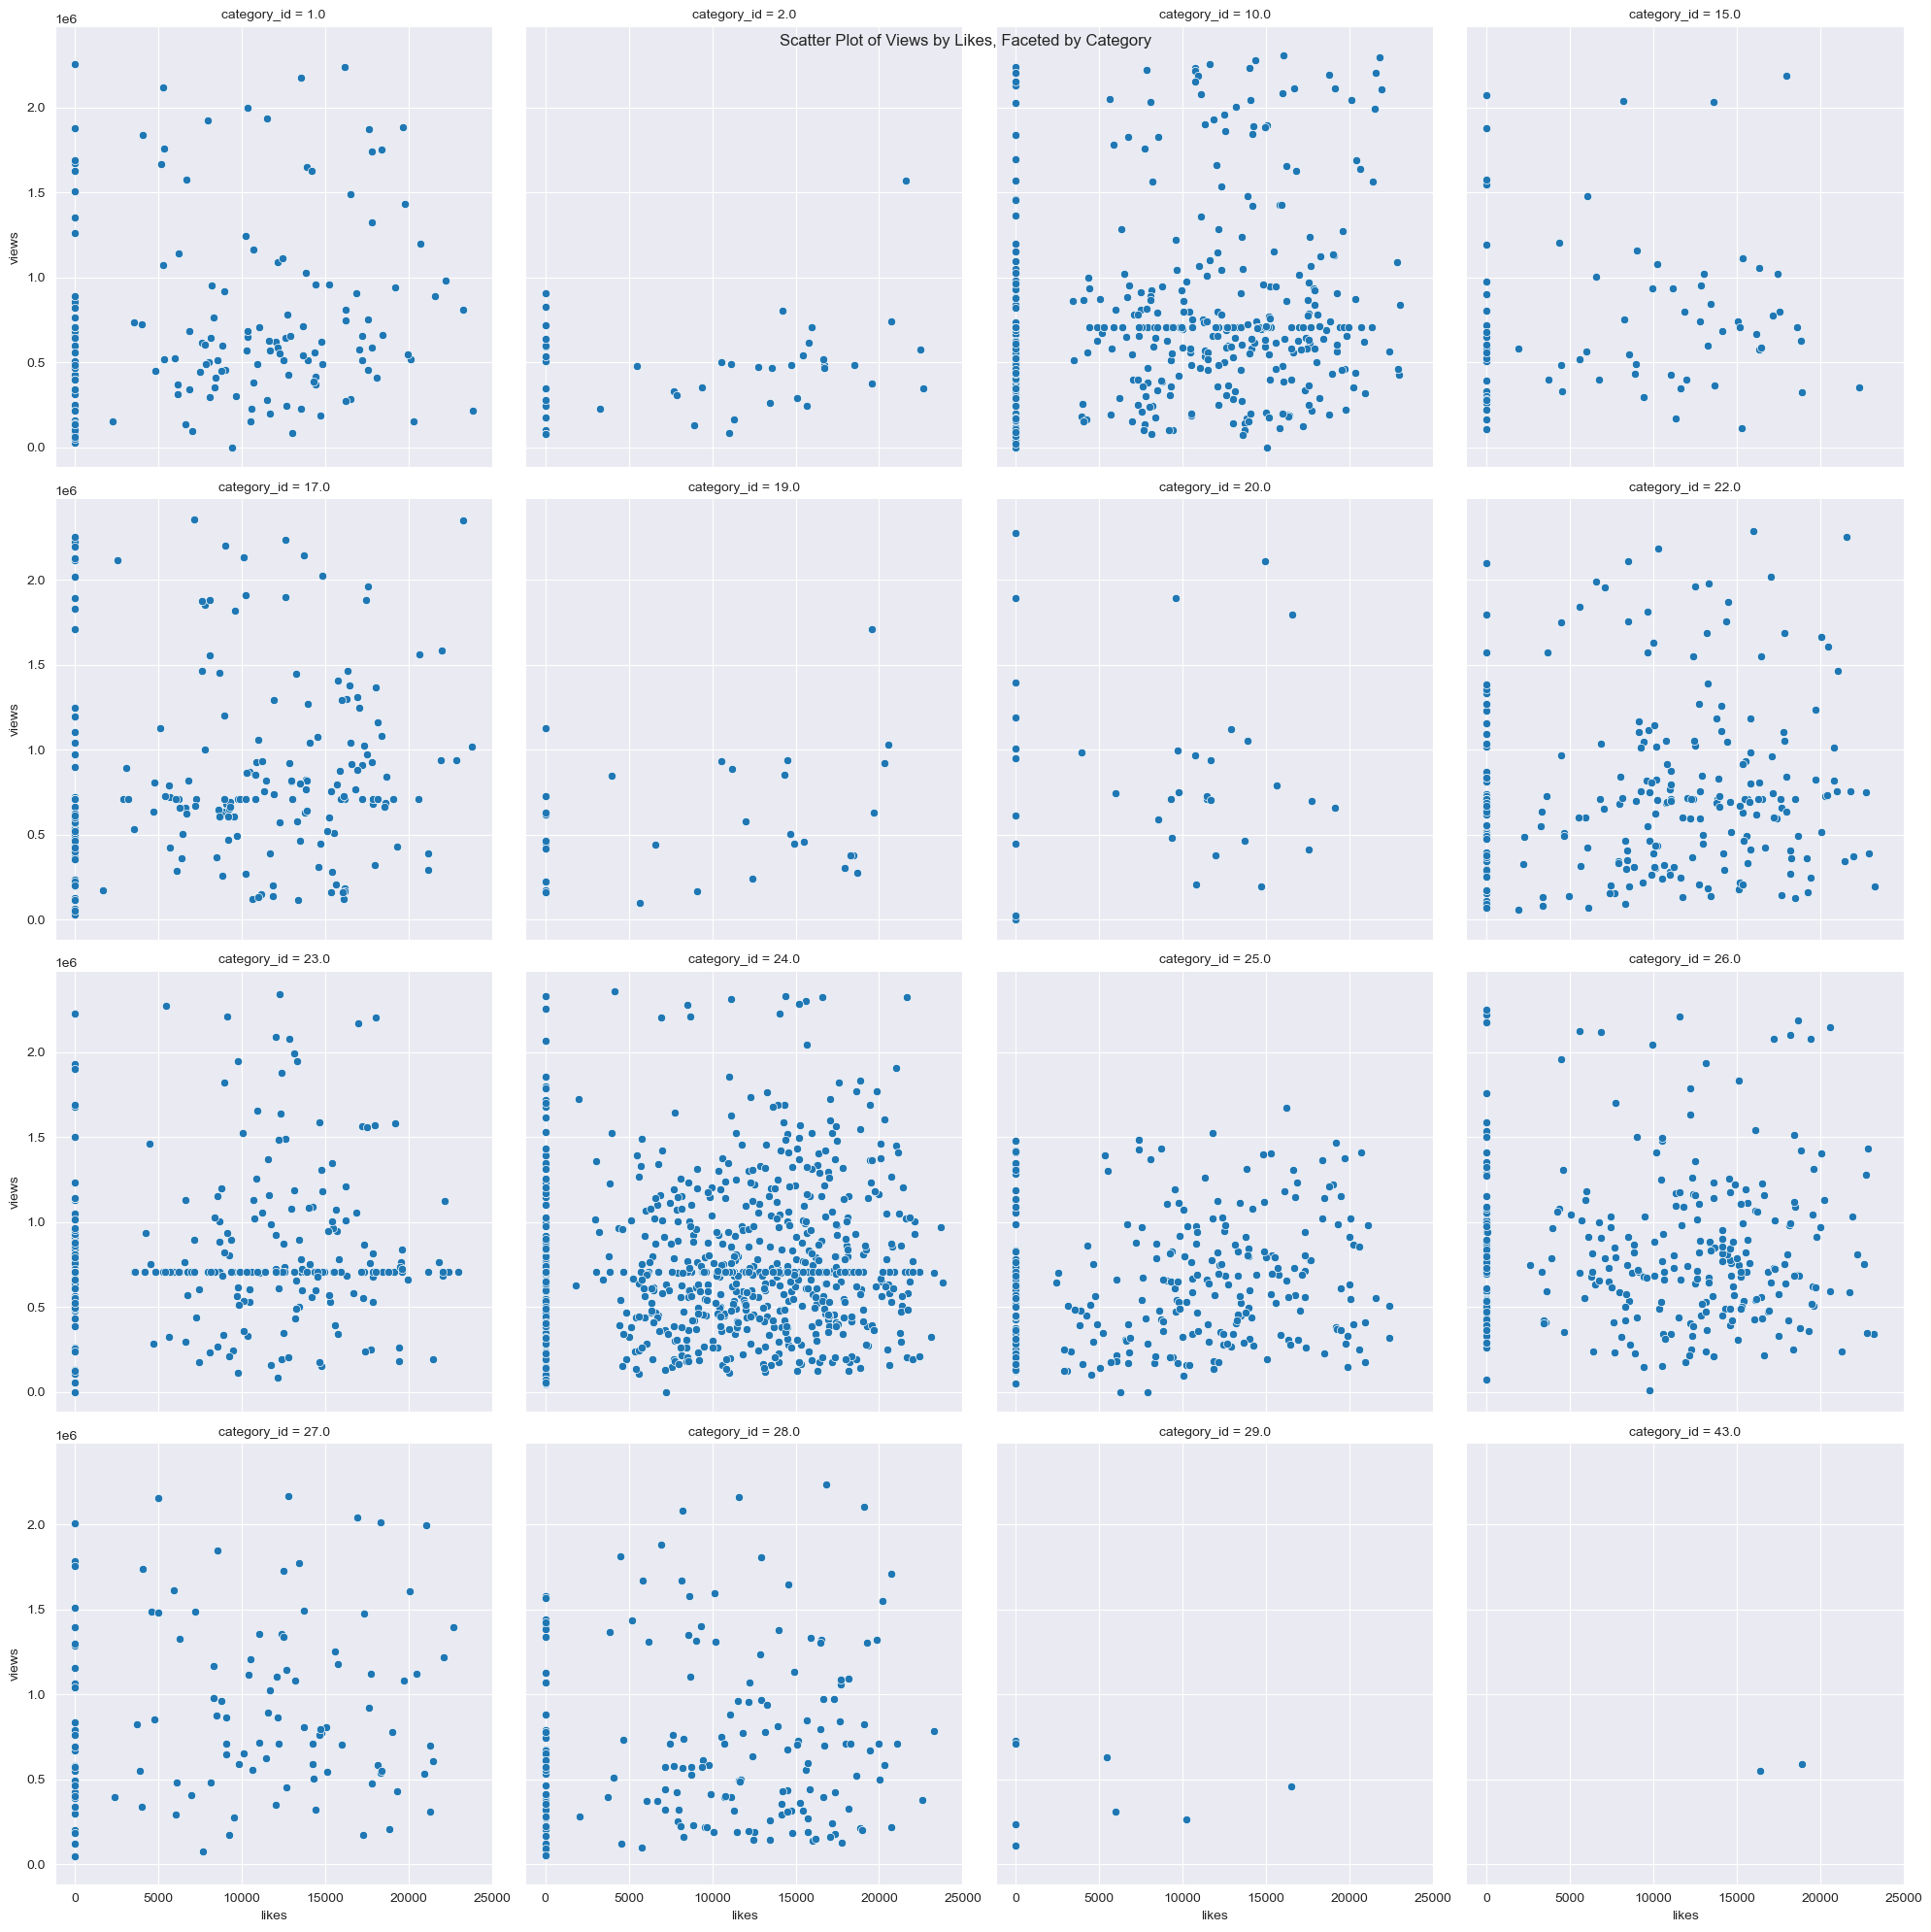

In [86]:
# Facet Grid with Scatter Plot
g = sns.FacetGrid(yt_views, col='category_id', col_wrap=4, height=5, aspect=1)
g = g.map(sns.scatterplot, 'likes', 'views')
plt.suptitle('Scatter Plot of Views by Likes, Faceted by Category')
plt.show()

#### Joint Plot

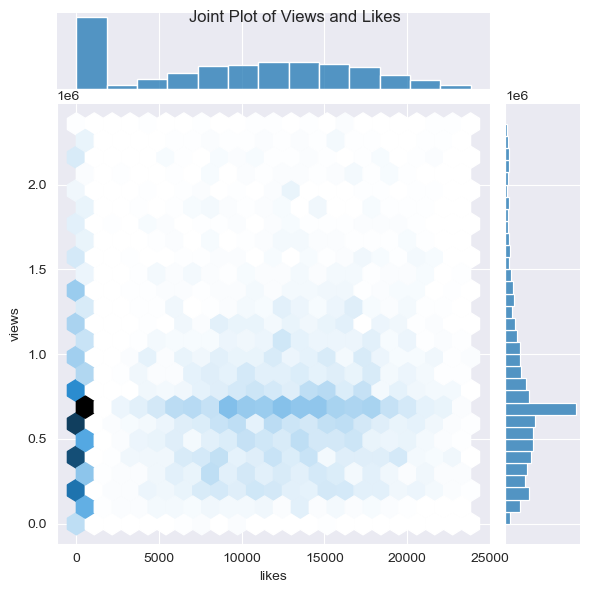

In [87]:
# Joint Plot
sns.jointplot(data=yt_views, x='likes', y='views', kind='hex')
plt.suptitle('Joint Plot of Views and Likes')
plt.show()

#### Cluster Map

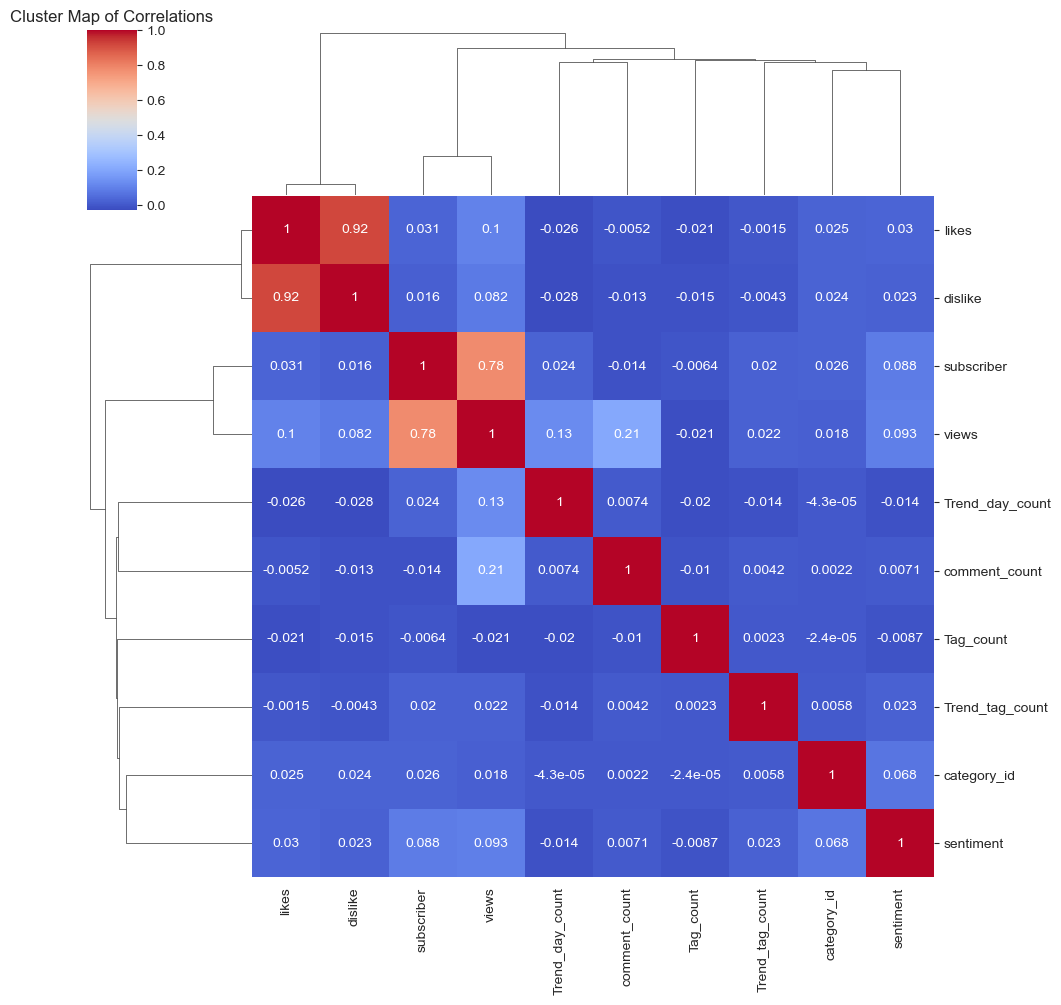

In [88]:
# Cluster Map
sns.clustermap(yt_views.corr(), annot=True, cmap='coolwarm')
plt.title('Cluster Map of Correlations')
plt.show()

#### 3D Plot

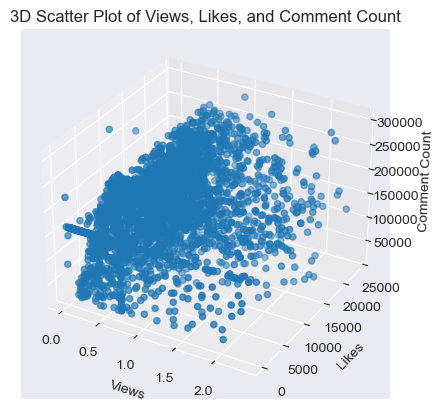

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(yt_views['views'], yt_views['likes'], yt_views['comment_count'])
ax.set_xlabel('Views')
ax.set_ylabel('Likes')
ax.set_zlabel('Comment Count')
plt.title('3D Scatter Plot of Views, Likes, and Comment Count')
plt.show()

*** 
### Predicting the number of views a YouTube video will get using a simple linear regression mode

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a copy of the original DataFrame
yt_views_copy = yt_views.copy()

# Preprocessing
# Drop unnecessary columns
columns_to_drop = ['Video_id', 'channel_title', 'subscriber', 'title', 'tags', 'description']
yt_views_copy = yt_views_copy.drop(columns=columns_to_drop)

# Convert 'TRUE'/'FALSE' string to actual boolean and then to integer
bool_columns = ['comment_disabled', 'like dislike disabled', 'tag appered in title']
for col in bool_columns:
    yt_views_copy[col] = yt_views_copy[col].apply(lambda x: 1 if x == 'TRUE' else 0 if x == 'FALSE' else x)

# Handling missing values by replacing them with the median of the column
for column in yt_views_copy.columns:
    yt_views_copy[column].fillna(yt_views_copy[column].median(), inplace=True)

# Convert boolean columns to integer (after making sure there are no NaNs)
for col in bool_columns:
    yt_views_copy[col] = yt_views_copy[col].astype(int)

# Feature and target variables
X = yt_views_copy.drop('views', axis=1)
y = yt_views_copy['views']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 462047.5243996383


***
### Sentiment Analysis on the 'description' column using VADER sentiment analysis tool from the Natural Language Toolkit (NLTK) library

In [91]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Sentiment analysis on 'description' and add a new column for the compound score
yt_views['sentiment'] = yt_views['description'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
print(yt_views.head())

     Video_id  category_id          channel_title  subscriber  \
0   HDR9SQc79         22.0           CaseyNeistat   9086142.0   
1  KNH52UF?48         24.0        LastWeekTonight   5937292.0   
2  QTW28IRG36         23.0           Rudy Mancuso   4191209.0   
3  MGL76WI]26         24.0  Good Mythical Morning   1281937.5   
4  TWP93KXT70         24.0               nigahiga   1281937.5   

                                               title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1  The Trump Presidency: Last Week Tonight with J...   
2  Racist Superman | Rudy Mancuso, King Bach & Le...   
3                   Nickelback Lyrics: Real or Fake?   
4                           I Dare You: GOING BALD!?   

                                                tags  \
0                                    SHANtell martin   
1  last week tonight trump presidency|last week t...   
2  racist superman|rudy|mancuso|king|bach|racist|...   
3  rhett and link|gmm|good mythical morning|rhet

***
### Sentiment Analysis using Naive Bayes classifier along with TF-IDF for feature extraction.

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a copy of the original DataFrame
yt_views_copy = yt_views.copy()

# Drop rows with empty descriptions or labels in the copy
yt_views_copy.dropna(subset=['description', 'comment_disabled'], inplace=True)

# Convert 'TRUE'/'FALSE' string to boolean if needed
yt_views_copy['comment_disabled'] = yt_views_copy['comment_disabled'].apply(lambda x: True if x == 'TRUE' else False if x == 'FALSE' else x)

# Convert boolean label to integer (True:1, False:0)
yt_views_copy['comment_disabled'] = yt_views_copy['comment_disabled'].astype(int)

# Feature extraction with TF-IDF
vectorizer = TfidfVectorizer(sublinear_tf=True, encoding='utf-8', decode_error='ignore')
X = vectorizer.fit_transform(yt_views_copy['description'])

# Convert boolean label to integer (True:1, False:0)
y = yt_views_copy['comment_disabled'].astype(int)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 69.38%
Confusion Matrix:
[[  0 243   0]
 [  1 555   0]
 [  0   1   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       243
           1       0.69      1.00      0.82       556
          25       0.00      0.00      0.00         1

    accuracy                           0.69       800
   macro avg       0.23      0.33      0.27       800
weighted avg       0.48      0.69      0.57       800
